In [1]:
%matplotlib inline
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

Using TensorFlow backend.
/home/shivam/virtual_env/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shivam/virtual_env/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shivam/virtual_env/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shivam/virtual_env/ml/lib/python3.6

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , x_train.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", y_train.shape)

Image Data Shape (60000, 28, 28)
Label Data Shape (60000,)


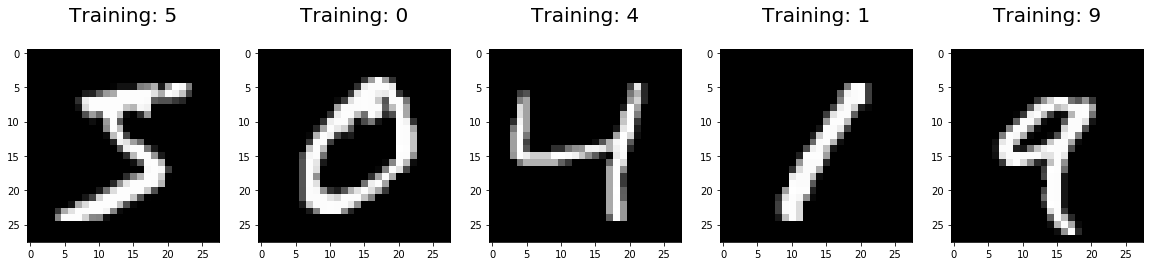

In [3]:
import numpy as np 
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [5]:
x_train.shape
x_test.shape

(10000, 784)

In [6]:
def logisticModel(solver = 'lbfgs',multi_class = 'auto' , max_iter  =100, C = 1.0,verbose = 1):
    logisticRegr = LogisticRegression(solver = solver,multi_class =  multi_class,max_iter  = max_iter,C=C,verbose = 1)
    return logisticRegr

In [17]:
logisticRegr = logisticModel()
logisticRegr.fit(x_train,y_train)
y_pred = logisticRegr.predict(x_test)

score = logisticRegr.score(x_train,y_train)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [21]:
y_test[1:10]

array([2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [14]:
iters = [0.001,0.5,1.0,2.0]
ans=[]
ans2 = []
print (iters)
for x in iters:
    logisticRegr = logisticModel(C = x)
    logisticRegr.fit(x_train, y_train)
    score = logisticRegr.score(x_test, y_test)
    ans.append(score)
print(ans)

[0.001, 0.5, 1.0, 2.0]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/shivam/virtual_env/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/shivam/virtual_env/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/shivam/virtual_env/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterat

[0.924, 0.9241, 0.9255, 0.9247]


/home/shivam/virtual_env/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.8s finished


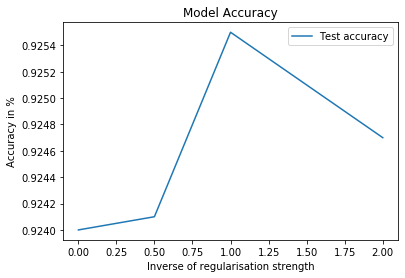

In [15]:
plt.plot(iters,ans)
legend = [];
legend.append('Test accuracy')
plt.xlabel('Inverse of regularisation strength')
plt.ylabel('Accuracy in %')
plt.title('Model Accuracy')
plt.legend(legend, loc='best')


In [ ]:
logisticRegr.predict(x_test[0:10])

In [ ]:
y_test[0:10]

In [ ]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [ ]:
import numpy as np 
import seaborn as sns
